############ 1.9347e+01 19.347
############ 3.2532e+02 325.32
############ 3.0774e+02 307.74
############ 7.2122e+01 72.122
############ 5.2870e+01 52.87
############ 5.3845e+01 53.845
############ 1.6147e+01 16.147
############ 2.4552e+02 245.52
############ 1.5762e+01 15.762
############ 1.6743e+01 16.743
############ 1.3857e+01 13.857
############ 1.1471e+01 11.471
############ 9.6705e+01 96.705
############ 9.5625e+01 95.625
############ 1.0840e+01 10.84
############ 1.2986e+01 12.986
############ 3.7324e+01 37.324
############ 1.7057e+01 17.057
############ 1.7136e+01 17.136
############ 1.1032e+02 110.32
############ 1.3635e+01 13.635
############ 1.7564e+01 17.564
############ 2.9076e+01 29.076
############ 1.1385e+01 11.385
############ 1.0847e+01 10.847
############ 4.7701e+02 477.01
############ 1.5816e+01 15.816
############ 4.8874e+02 488.74
############ 3.9600e+01 39.6
############ 3.7645e+01 37.645
############ 4.5552e+01 45.552
############ 1.1311e+01 11.311
############

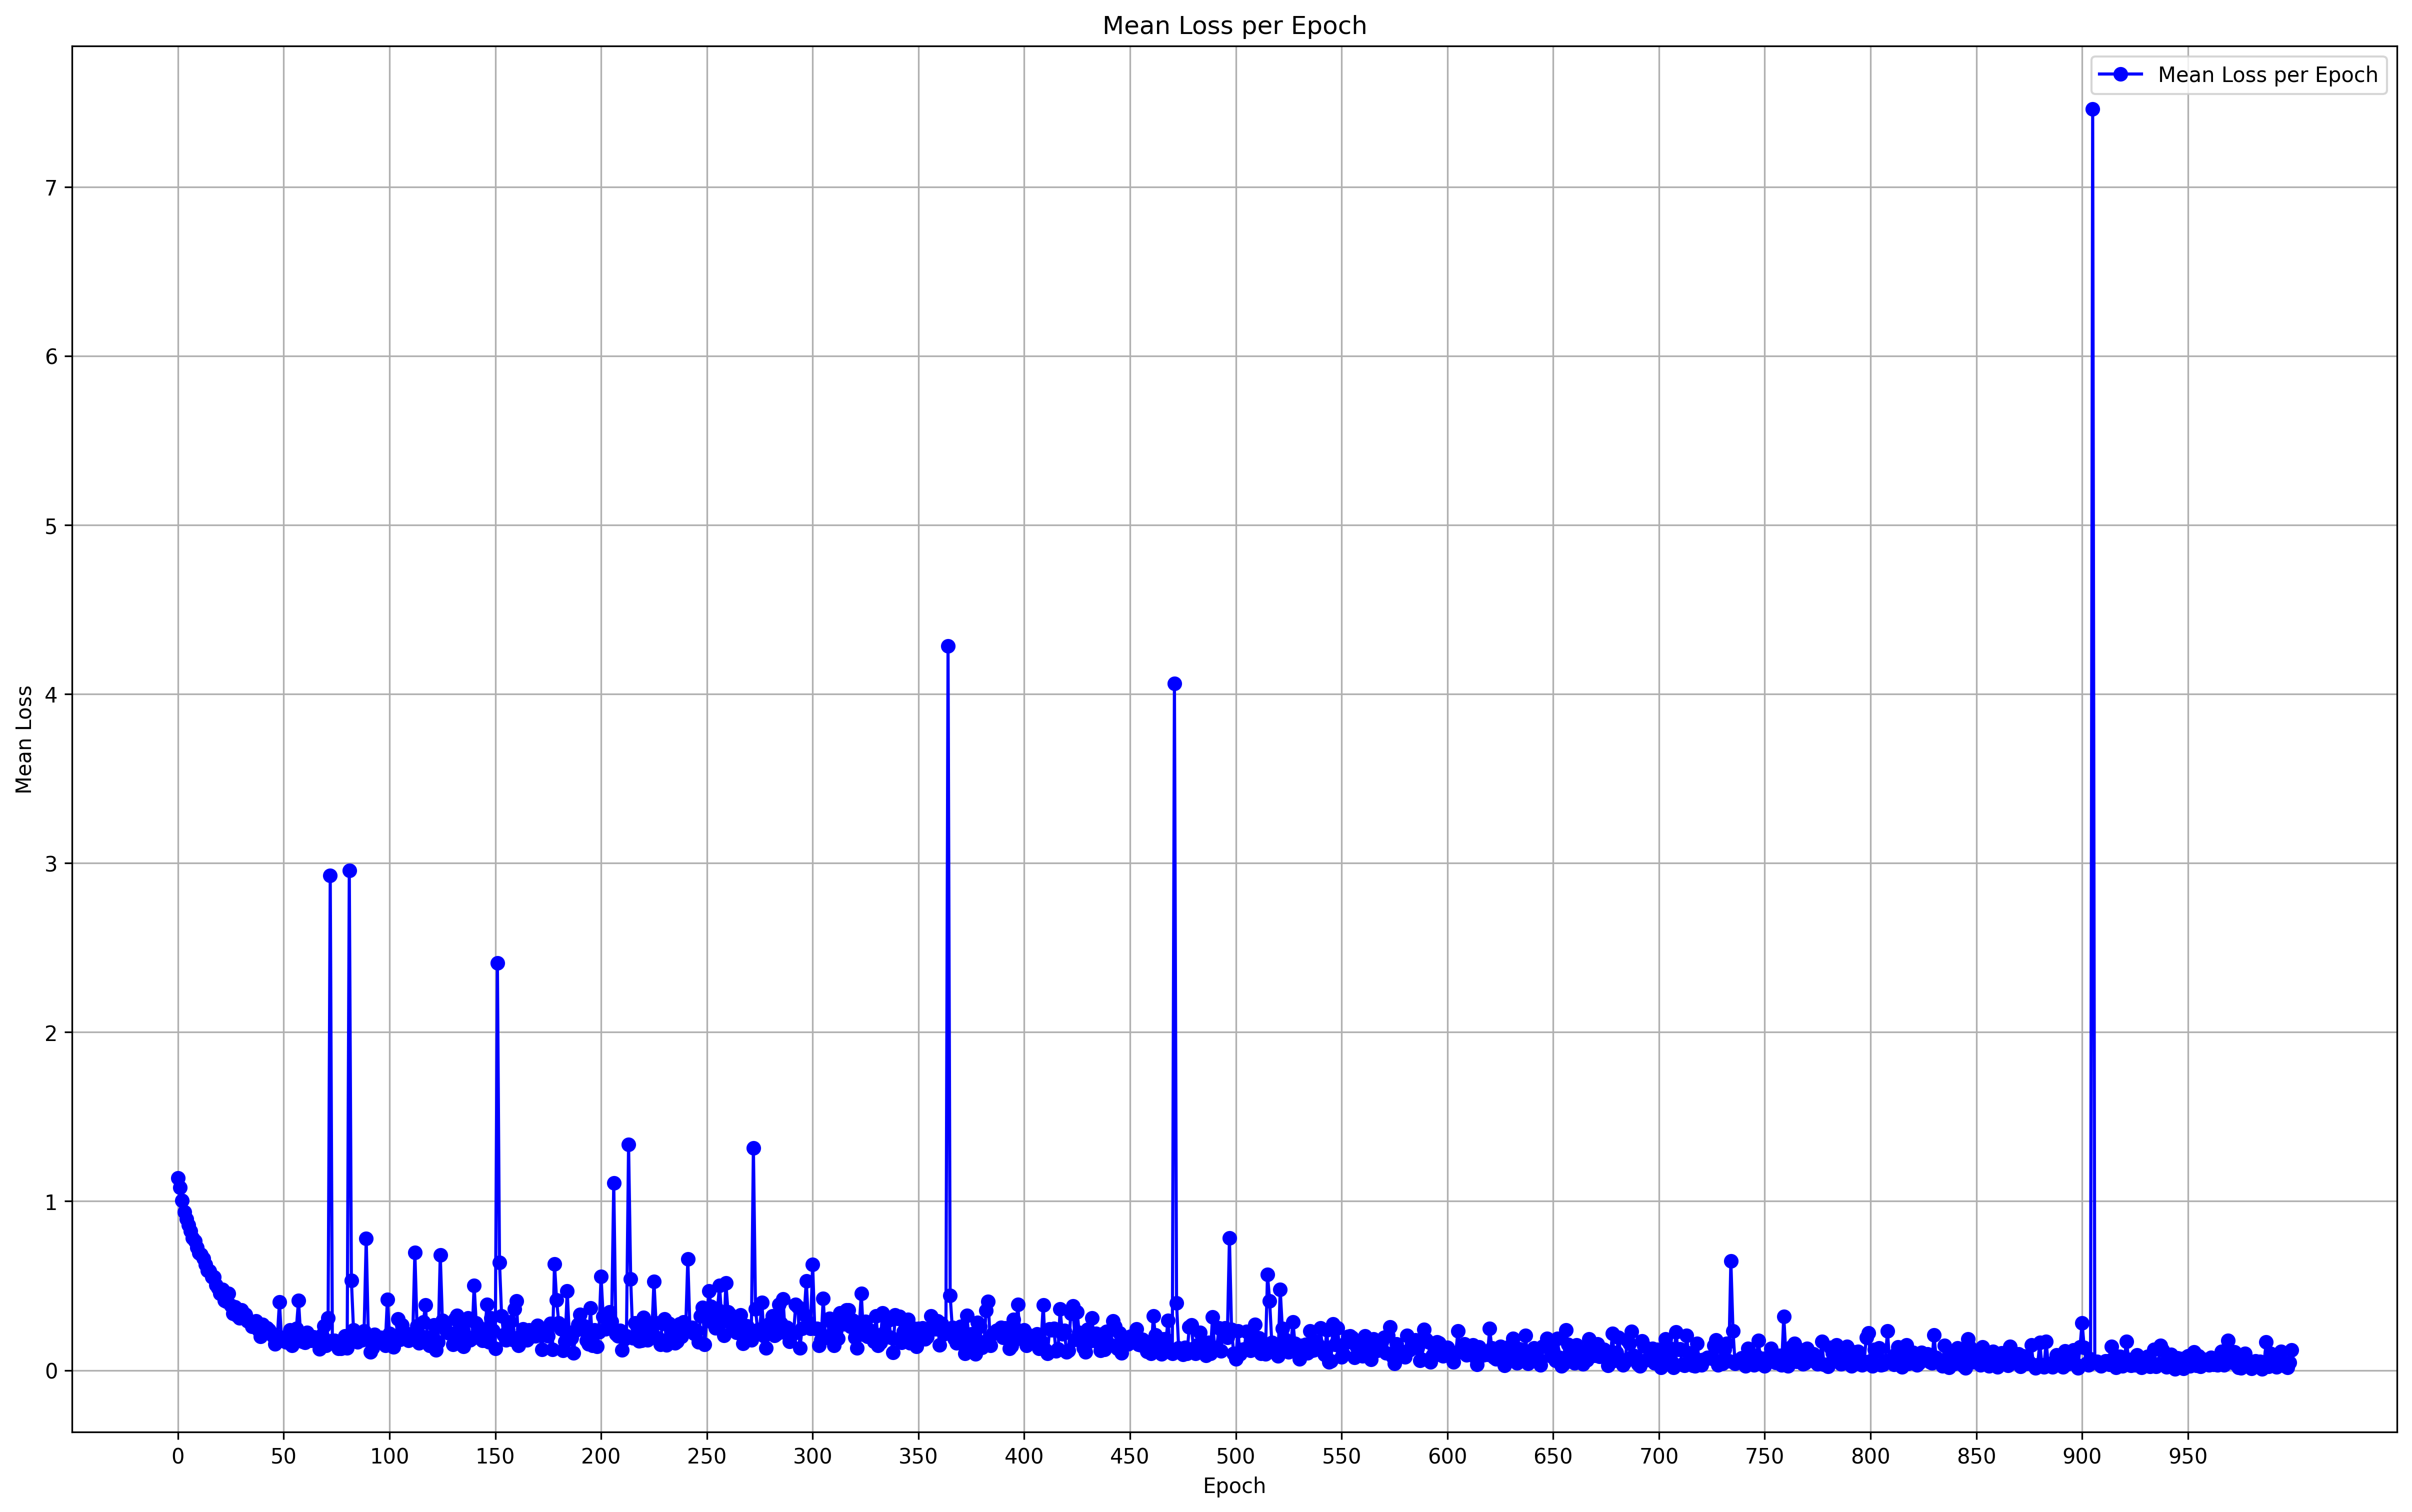

In [6]:
import re
import matplotlib.pyplot as plt

with open('checkpoints/Pathway/Pathway_model/verbose.log', 'r')as f:
    epoch_losses = {}
    current_epoch = None
    for line in f.readlines():
        epoch_match = re.match(r'Epoch (\d+)', line)
        loss_match = re.match(r'Loss = ([-+]?[0-9]*\.?[0-9]+[eE][-+]?[0-9]+)', line)
        if epoch_match:
            current_epoch = int(epoch_match.group(1))
            epoch_losses[current_epoch] = []
        elif loss_match and current_epoch is not None:
            try:
                epoch_losses[current_epoch].append(float(loss_match.group(1)))
            except ValueError:
                print('Error parsing loss value on line: {}'.format(line), f'##########{loss_match.group(1)}')
            if float(loss_match.group(1)) > 10:
                print('############',loss_match.group(1), float(loss_match.group(1)))

epochs = []
mean_losses = []

for epoch, losses in epoch_losses.items():
    mean_loss = sum(losses) / len(losses)
    epochs.append(epoch)
    mean_losses.append(mean_loss)
    
# 绘制每个Epoch的平均Loss值
last_epoch_losses = epochs[:-1]
plt.figure(figsize=(20, 12),dpi=300)
plt.plot(epochs, mean_losses, marker='o', linestyle='-', color='b', label='Mean Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Loss')
plt.title('Mean Loss per Epoch')
plt.legend()
plt.grid(True)

# 设置X轴的刻度间隔为10
plt.xticks(range(0, len(last_epoch_losses), 50))

plt.show()
